In [1]:
#Partie 1 : Chargement et exploration du dataset

*Partie 1 : Chargement et exploration du dataset*

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('employees2.csv')

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote
0,0,1,Othmane,NaN,NaN,IT,0,Yes
1,1,2,Ikram,22.0,NaN,HR,23,Yes
2,2,3,Bob,NaN,NaN,HR,26,Yes
3,3,4,Zineb,59.0,73665.0,HR,3,No
4,4,5,David,57.0,59325.0,Finance,33,No


In [5]:
data.dtypes

Unnamed: 0            int64
ID                    int64
Name                 object
Age                 float64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
dtype: object

In [6]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                 49
Salary              44
Department           0
Years_Experience     0
Remote               0
dtype: int64

In [7]:
#Partie 2 : Nettoyage des données

In [8]:
data['Age']=data['Age'].fillna(np.median(data['Age'].dropna()))
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote
0,0,1,Othmane,45.0,NaN,IT,0,Yes
1,1,2,Ikram,22.0,NaN,HR,23,Yes
2,2,3,Bob,45.0,NaN,HR,26,Yes
3,3,4,Zineb,59.0,73665.0,HR,3,No
4,4,5,David,57.0,59325.0,Finance,33,No


In [9]:
data['salaire_departement']=data.groupby('Department')['Salary'].transform('mean')
data['Salary']=data['Salary'].fillna(data['salaire_departement'])
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement
0,0,1,Othmane,45.0,69930.000000,IT,0,Yes,69930.000000
1,1,2,Ikram,22.0,61659.733333,HR,23,Yes,61659.733333
2,2,3,Bob,45.0,61659.733333,HR,26,Yes,61659.733333
3,3,4,Zineb,59.0,73665.000000,HR,3,No,61659.733333
4,4,5,David,57.0,59325.000000,Finance,33,No,57836.583333


In [10]:
data['Age']=data['Age'].astype(int)
data['Salary']=data['Salary'].astype(int)
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement
0,0,1,Othmane,45,69930,IT,0,Yes,69930.000000
1,1,2,Ikram,22,61659,HR,23,Yes,61659.733333
2,2,3,Bob,45,61659,HR,26,Yes,61659.733333
3,3,4,Zineb,59,73665,HR,3,No,61659.733333
4,4,5,David,57,59325,Finance,33,No,57836.583333


In [11]:
data["Remote"] = data["Remote"].apply(lambda x: 'Oui' if x=='Yes' else 'Non' if x=='No' else x)
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement
0,0,1,Othmane,45,69930,IT,0,Oui,69930.000000
1,1,2,Ikram,22,61659,HR,23,Oui,61659.733333
2,2,3,Bob,45,61659,HR,26,Oui,61659.733333
3,3,4,Zineb,59,73665,HR,3,Non,61659.733333
4,4,5,David,57,59325,Finance,33,Non,57836.583333


In [12]:
data['Ancienneté_Catégorie']=data["Years_Experience"].apply(lambda x: 'Junior' if x<3
                                                             else 'Intermédiaire' if x<7
                                                               else 'Senior' if x<15
                                                               else 'Expert')
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement,Ancienneté_Catégorie
0,0,1,Othmane,45,69930,IT,0,Oui,69930.000000,Junior
1,1,2,Ikram,22,61659,HR,23,Oui,61659.733333,Expert
2,2,3,Bob,45,61659,HR,26,Oui,61659.733333,Expert
3,3,4,Zineb,59,73665,HR,3,Non,61659.733333,Intermédiaire
4,4,5,David,57,59325,Finance,33,Non,57836.583333,Expert


Partie 3 : Analyses exploratoires et statistiques

In [13]:
print(data[data['Salary']==data['Salary'].max()])

    Unnamed: 0  ID   Name  Age  Salary Department  Years_Experience Remote  \
27          27  28  Jalil   45   84685  Marketing                28    Oui   

    salaire_departement Ancienneté_Catégorie  
27         70395.153846               Expert  


In [14]:
salaire_departement_tab=pd.pivot_table(data=data,
                                       values='Salary',
                                       index='Department',
                                       aggfunc='mean')
print(salaire_departement_tab)

                  Salary
Department              
Finance     57836.350000
HR          61659.392857
IT          69930.000000
Logistics   64544.400000
Marketing   70395.080000


In [15]:
salaire_anciennete_tab=pd.pivot_table(data=data,
                                       values='Salary',
                                       index='Ancienneté_Catégorie',
                                       aggfunc=['mean','median'])
print(salaire_anciennete_tab)

                              mean   median
                            Salary   Salary
Ancienneté_Catégorie                       
Expert                64211.953125  62747.5
Intermédiaire         66616.545455  64306.0
Junior                61558.000000  69930.0
Senior                65012.800000  68418.0


In [16]:
nb_remote_tab=pd.pivot_table(data=data,
                                       values='ID',
                                       index='Remote',
                                       aggfunc='count')
print(nb_remote_tab)

        ID
Remote    
Non     45
Oui     55


Partie 4 : Tableaux croisés dynamiques (pivot tables)

In [17]:
salaire_departement_remote_tab=pd.pivot_table(data=data,
                                       values='Salary',
                                       index=['Department','Remote'],
                                       aggfunc='mean')
print(salaire_departement_remote_tab)

                         Salary
Department Remote              
Finance    Non     60964.538462
           Oui     52026.857143
HR         Non     62817.266667
           Oui     60323.384615
IT         Non     65695.000000
           Oui     71341.666667
Logistics  Non     65080.428571
           Oui     64075.375000
Marketing  Non     69812.428571
           Oui     70621.666667


In [18]:
data['Groupe_Age']=data["Age"].apply(lambda x: 'Jeune' if x<30
                                                             else 'Moyen' if x<45
                                                               else 'Senior')
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement,Ancienneté_Catégorie,Groupe_Age
0,0,1,Othmane,45,69930,IT,0,Oui,69930.000000,Junior,Senior
1,1,2,Ikram,22,61659,HR,23,Oui,61659.733333,Expert,Jeune
2,2,3,Bob,45,61659,HR,26,Oui,61659.733333,Expert,Senior
3,3,4,Zineb,59,73665,HR,3,Non,61659.733333,Intermédiaire,Senior
4,4,5,David,57,59325,Finance,33,Non,57836.583333,Expert,Senior


In [19]:
Years_experience_age_tab=pd.pivot_table(data=data,
                                       values='Years_Experience',
                                       index=['Groupe_Age','Department'],
                                       aggfunc='mean')
print(Years_experience_age_tab)

                       Years_Experience
Groupe_Age Department                  
Jeune      HR                 22.250000
           IT                 13.000000
           Logistics          19.000000
           Marketing          18.000000
Moyen      Finance            26.666667
           HR                 27.000000
           IT                 34.000000
           Logistics          16.800000
           Marketing          12.000000
Senior     Finance            15.928571
           HR                 16.521739
           IT                 16.333333
           Logistics          17.111111
           Marketing          21.650000


Partie 5 : Calculs avancés avec NumPy

In [20]:
data['Performance']=np.where(data['Salary']<60000,'Bon',np.where(data['Salary']<80000,"Moyen","Haut"))
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement,Ancienneté_Catégorie,Groupe_Age,Performance
0,0,1,Othmane,45,69930,IT,0,Oui,69930.000000,Junior,Senior,Moyen
1,1,2,Ikram,22,61659,HR,23,Oui,61659.733333,Expert,Jeune,Moyen
2,2,3,Bob,45,61659,HR,26,Oui,61659.733333,Expert,Senior,Moyen
3,3,4,Zineb,59,73665,HR,3,Non,61659.733333,Intermédiaire,Senior,Moyen
4,4,5,David,57,59325,Finance,33,Non,57836.583333,Expert,Senior,Bon


In [21]:
conditions=[(data['Groupe_Age']=="Jeune") & (data['Ancienneté_Catégorie']=="Junior"),
            (data['Groupe_Age']=="Jeune") & (data['Ancienneté_Catégorie']=="Expert"),
            (data['Groupe_Age']=="Senior") & (data['Ancienneté_Catégorie']=="Expert"),
            (data['Groupe_Age']=="Senior") & (data['Ancienneté_Catégorie']=="Expert")]

choix = ['Jeune & Nouveau', 'Jeune & Expérimenté', 'Senior & Nouveau', 'Senior & Expérimenté']

data['classe'] = np.select(conditions, choix,default='fail')

print(data.head())

   Unnamed: 0  ID     Name  Age  Salary Department  Years_Experience Remote  \
0           0   1  Othmane   45   69930         IT                 0    Oui   
1           1   2    Ikram   22   61659         HR                23    Oui   
2           2   3      Bob   45   61659         HR                26    Oui   
3           3   4    Zineb   59   73665         HR                 3    Non   
4           4   5    David   57   59325    Finance                33    Non   

   salaire_departement Ancienneté_Catégorie Groupe_Age Performance  \
0         69930.000000               Junior     Senior       Moyen   
1         61659.733333               Expert      Jeune       Moyen   
2         61659.733333               Expert     Senior       Moyen   
3         61659.733333        Intermédiaire     Senior       Moyen   
4         57836.583333               Expert     Senior         Bon   

                classe  
0                 fail  
1  Jeune & Expérimenté  
2     Senior & Nouveau  
3   

In [22]:
data['salaire_salaire_department']=data['Salary']-data['salaire_departement']
data.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,salaire_departement,Ancienneté_Catégorie,Groupe_Age,Performance,classe,salaire_salaire_department
0,0,1,Othmane,45,69930,IT,0,Oui,69930.000000,Junior,Senior,Moyen,fail,0.000000
1,1,2,Ikram,22,61659,HR,23,Oui,61659.733333,Expert,Jeune,Moyen,Jeune & Expérimenté,-0.733333
2,2,3,Bob,45,61659,HR,26,Oui,61659.733333,Expert,Senior,Moyen,Senior & Nouveau,-0.733333
3,3,4,Zineb,59,73665,HR,3,Non,61659.733333,Intermédiaire,Senior,Moyen,fail,12005.266667
4,4,5,David,57,59325,Finance,33,Non,57836.583333,Expert,Senior,Bon,Senior & Nouveau,1488.416667


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

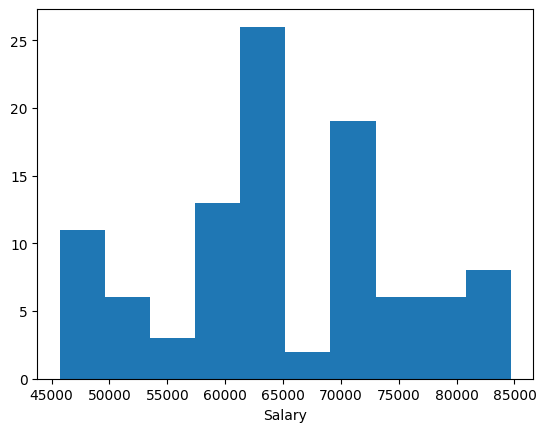

In [25]:
plt.hist(data['Salary'])
plt.xlabel("Salary")
plt.show()

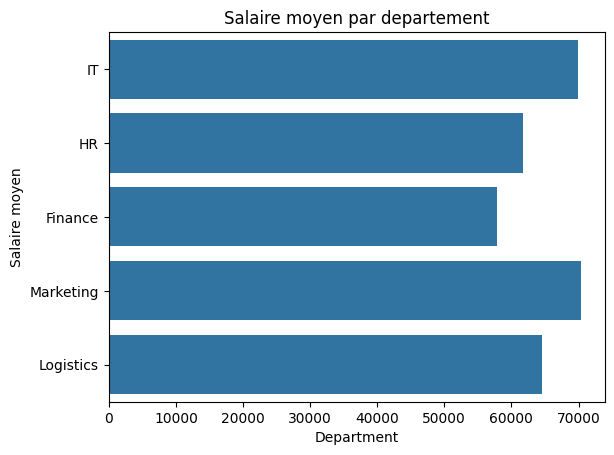

In [27]:
sns.barplot(x='salaire_departement', y='Department', data=data)
plt.xlabel("Department")
plt.ylabel("Salaire moyen")
plt.title("Salaire moyen par departement")
plt.show()

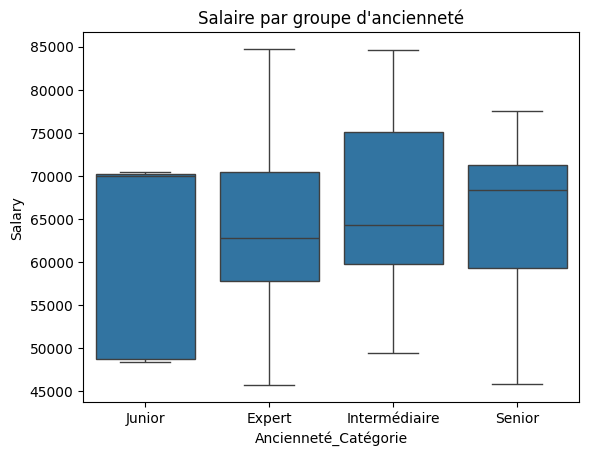

In [28]:
sns.boxplot(
    x='Ancienneté_Catégorie',
    y='Salary',
    data=data,
)
plt.title("Salaire par groupe d'ancienneté")
plt.show()